In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns
import os
import re


In [19]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\normalizedCounts.txt',delimiter = "\t")

In [20]:
df

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
0,G1,0.000000,3.958608,3.335081,1.842095,2.025381,2.756255,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.546449,0.781852,0.000000,2.990959,4.611881,0.000000,1.649003,0.000000
1,G2,7.277933,7.913089,8.238561,8.424387,9.545450,7.990284,9.082155,9.329767,8.384522,...,9.416794,9.343192,9.008037,8.435803,7.841555,7.731928,8.789565,8.289456,8.898950,8.756475
2,G3,0.000000,1.622092,0.000000,1.197017,2.025381,0.000000,1.173272,2.890287,1.108965,...,1.514571,1.673958,1.956599,0.781852,0.802307,0.825562,1.014107,0.000000,2.889182,0.000000
3,G4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,G5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45970,G45971,0.000000,0.000000,0.000000,2.286276,0.000000,0.000000,1.811657,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.633946,0.000000,1.603742,0.000000,0.000000,0.000000
45971,G45972,9.722930,10.003650,9.524363,9.488686,10.362950,9.540568,9.967824,9.965025,9.743340,...,9.893189,9.617170,9.798326,9.461952,9.223031,9.392454,9.684468,9.351179,10.094930,9.455420
45972,G45973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.811657,0.000000,1.108965,...,0.000000,3.579475,2.275587,0.000000,1.314856,2.679328,0.000000,2.053210,0.000000,0.000000
45973,G45974,7.682646,7.163473,7.651159,8.130378,7.591986,7.909691,8.693380,6.203475,8.312850,...,7.700931,6.788482,7.913617,8.365172,8.927063,7.768153,8.367842,8.466919,8.166145,8.021732


In [36]:
df.isna().sum().tail(10)

S50    1
S51    1
S52    1
S53    1
S54    1
S55    1
S56    1
S57    1
S58    1
S59    1
dtype: int64

In [37]:
df.dropna(inplace=True)

In [49]:
df.head(10)

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
0,G1,0.000000,3.958608,3.335081,1.842095,2.025381,2.756255,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.546449,0.781852,0.000000,2.990959,4.611881,0.000000,1.649003,0.000000
1,G2,7.277933,7.913089,8.238561,8.424387,9.545450,7.990284,9.082155,9.329767,8.384522,...,9.416794,9.343192,9.008037,8.435803,7.841555,7.731928,8.789565,8.289456,8.898950,8.756475
2,G3,0.000000,1.622092,0.000000,1.197017,2.025381,0.000000,1.173272,2.890287,1.108965,...,1.514571,1.673958,1.956599,0.781852,0.802307,0.825562,1.014107,0.000000,2.889182,0.000000
3,G4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,G5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,G6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.108965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,G7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,G8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,G9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,G10,5.273963,6.912855,5.473709,6.119159,7.580459,4.586501,6.022734,0.000000,6.357263,...,6.142468,6.339270,6.246369,6.885720,5.769769,5.363020,6.437142,5.495182,1.649003,6.163495


In [50]:
df.tail(10)

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
45964,G45965,9.878074,9.760909,9.965878,9.951107,10.328910,9.136542,9.685052,9.825813,9.563122,...,10.124390,10.041280,10.165890,9.485307,9.263756,10.156810,9.871969,9.638859,9.419062,9.646541
45965,G45966,9.813615,10.049640,10.348870,9.180177,10.109860,9.332184,10.631500,9.870982,8.775812,...,9.643079,9.343192,9.788959,9.187213,8.819528,9.493282,9.426780,9.317740,10.443680,8.686253
45966,G45967,10.215370,10.612770,9.952702,9.800312,10.550400,10.048520,9.938596,10.372350,9.846653,...,9.930733,9.530073,10.051720,10.127800,9.495510,9.655407,10.015310,9.723278,10.416880,9.382683
45967,G45968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
45968,G45969,9.679381,9.549122,9.520399,9.504178,10.031600,9.863001,9.601268,9.617775,9.433948,...,9.629613,9.986248,10.009330,10.012970,9.519104,9.875371,9.567199,9.588094,10.052030,9.717267
45969,G45970,2.146181,0.000000,2.333626,1.842095,3.117277,2.983255,2.589980,0.000000,0.000000,...,2.716204,2.695375,3.269688,3.943616,2.449780,2.990959,3.484979,3.490367,1.048295,3.069827
45970,G45971,0.000000,0.000000,0.000000,2.286276,0.000000,0.000000,1.811657,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.633946,0.000000,1.603742,0.000000,0.000000,0.000000
45971,G45972,9.722930,10.003650,9.524363,9.488686,10.362950,9.540568,9.967824,9.965025,9.743340,...,9.893189,9.617170,9.798326,9.461952,9.223031,9.392454,9.684468,9.351179,10.094930,9.455420
45972,G45973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.811657,0.000000,1.108965,...,0.000000,3.579475,2.275587,0.000000,1.314856,2.679328,0.000000,2.053210,0.000000,0.000000
45973,G45974,7.682646,7.163473,7.651159,8.130378,7.591986,7.909691,8.693380,6.203475,8.312850,...,7.700931,6.788482,7.913617,8.365172,8.927063,7.768153,8.367842,8.466919,8.166145,8.021732


In [52]:
df=df.iloc[:,1:]

In [53]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
0,0.000000,3.958608,3.335081,1.842095,2.025381,2.756255,0.000000,0.000000,0.000000,2.296334,...,0.000000,0.000000,1.546449,0.781852,0.000000,2.990959,4.611881,0.000000,1.649003,0.000000
1,7.277933,7.913089,8.238561,8.424387,9.545450,7.990284,9.082155,9.329767,8.384522,8.017907,...,9.416794,9.343192,9.008037,8.435803,7.841555,7.731928,8.789565,8.289456,8.898950,8.756475
2,0.000000,1.622092,0.000000,1.197017,2.025381,0.000000,1.173272,2.890287,1.108965,0.984057,...,1.514571,1.673958,1.956599,0.781852,0.802307,0.825562,1.014107,0.000000,2.889182,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45969,2.146181,0.000000,2.333626,1.842095,3.117277,2.983255,2.589980,0.000000,0.000000,3.876986,...,2.716204,2.695375,3.269688,3.943616,2.449780,2.990959,3.484979,3.490367,1.048295,3.069827
45970,0.000000,0.000000,0.000000,2.286276,0.000000,0.000000,1.811657,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.633946,0.000000,1.603742,0.000000,0.000000,0.000000
45971,9.722930,10.003650,9.524363,9.488686,10.362950,9.540568,9.967824,9.965025,9.743340,9.248759,...,9.893189,9.617170,9.798326,9.461952,9.223031,9.392454,9.684468,9.351179,10.094930,9.455420
45972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.811657,0.000000,1.108965,0.000000,...,0.000000,3.579475,2.275587,0.000000,1.314856,2.679328,0.000000,2.053210,0.000000,0.000000


In [54]:
df.isna().sum().tail(10)

S50    0
S51    0
S52    0
S53    0
S54    0
S55    0
S56    0
S57    0
S58    0
S59    0
dtype: int64

In [55]:
df.isna()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S50,S51,S52,S53,S54,S55,S56,S57,S58,S59
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45974 entries, 0 to 45973
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      45974 non-null  float64
 1   S2      45974 non-null  float64
 2   S3      45974 non-null  float64
 3   S4      45974 non-null  float64
 4   S5      45974 non-null  float64
 5   S6      45974 non-null  float64
 6   S7      45974 non-null  float64
 7   S8      45974 non-null  float64
 8   S9      45974 non-null  float64
 9   S10     45974 non-null  float64
 10  S11     45974 non-null  float64
 11  S12     45974 non-null  float64
 12  S13     45974 non-null  float64
 13  S14     45974 non-null  float64
 14  S15     45974 non-null  float64
 15  S16     45974 non-null  float64
 16  S17     45974 non-null  float64
 17  S18     45974 non-null  float64
 18  S19     45974 non-null  float64
 19  S20     45974 non-null  float64
 20  S21     45974 non-null  float64
 21  S22     45974 non-null  float64
 22

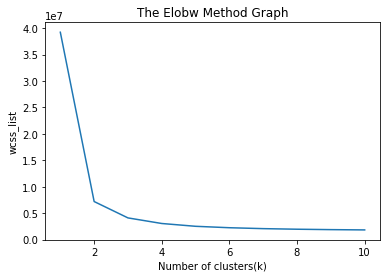

In [59]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [64]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df)

In [66]:
df1=y_predict

In [84]:
DF=pd.DataFrame(df1)

In [85]:
DF

,0
0,0
1,3
2,1
3,1
4,1
...,...
45969,0
45970,1
45971,3
45972,1


In [87]:
DF.rename(columns = {0:'Traget'})

,Traget
0,0
1,3
2,1
3,1
4,1
...,...
45969,0
45970,1
45971,3
45972,1


In [88]:
x=df
y=DF


In [114]:
x.value_counts()

S1        S2        S3         S4        S5        S6        S7        S8        S9        S10       S11       S12        S13        S14        S15        S16        S17        S18        S19        S20       S21        S22        S23       S24        S25        S26        S27      S28       S29        S30        S31        S32        S33       S34       S35        S36        S37       S38        S39        S40       S41        S42       S43        S44       S45        S46        S47        S48        S49      S50        S51        S52        S53        S54        S55       S56        S57       S58       S59      
0.00000   0.00000   0.000000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.00000   0.000000   0.000000   0.00000   0.000000   0.000000   0.000000   0.0000   0.00000   0.000000   0.000000   0.000000   0.000000   0.00000   0.00000   0.000000   0.000000  

In [109]:
y.value_counts()

1    30191
0     4696
3     4566
4     3562
2     2959
dtype: int64

TypeError: scatter() missing 1 required positional argument: 'y'

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split( x ,y,train_size = 0.70,random_state = 100)

In [91]:
print(x_train.head(5))
print(x_test.head(5))
print(y_train.head(5))
print(y_test.head(5))

              S1         S2         S3         S4         S5         S6  \
16300   9.615696   7.931628   9.536188  10.880873   8.295729   7.421135   
26141   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
6602   12.985166  13.494778  13.411077  13.133706  13.525530  13.928485   
22604   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
13216   8.989049   9.225173   9.629299   9.230717   7.824755  10.528397   

              S7         S8         S9        S10  ...        S50        S51  \
16300   7.842043   9.118490   7.888799   8.258058  ...  10.047996  10.481254   
26141   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
6602   12.800332  12.841122  13.369020  13.086718  ...  12.918753  13.052969   
22604   0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
13216   8.927103   7.746890  10.025440   9.953810  ...   8.926716   8.925649   

             S52        S53        S54        S55        S56        

In [99]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))


0.9031392735445516


In [102]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))


0.9527296454723411


In [104]:
from sklearn.ensemble import RandomForestClassifier  
rf_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_classifier.fit(x_train, y_train)
y_pred= rf_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

C:\Users\Admin\AppData\Local\Temp\ipykernel_16320\4049421058.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


0.9762923221924165


In [110]:
from sklearn.svm import SVC # "Support vector classifier"  
sv_classifier = SVC(kernel='linear', random_state=0)  
sv_classifier.fit(x_train, y_train)
y_pred= sv_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9979699847748859


In [113]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black','yellow','orgen'])
 
# Plot the Original Classifications
plt.scatter(df,c=colormap[sv_classifier])
plt.title('K Mean Clustering')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices